# Lineær regresjon

### Data

Vi skal i denne delen av guiden lære om lineær regresjon i Python. Først lager vi, som tidligere, en DataFrame som inneholder tallene våre. Her bruker vi DataFrame.from_dict, og sender inn en dict med X-verdier og Y-verdier. Denne plottes så med en scatter plot. Merk at vi spesifiserer hvilke kolonner vi ønsker å presentere i plottet, på X- og Y-aksen. Vi kunne hatt enda flere kolonner i DataFramen, men fremdeles plukket ut de to kolonnene vi ville plotte ved å spesifisere andre kolonnenavn i "x"- og "y"-parameterne.

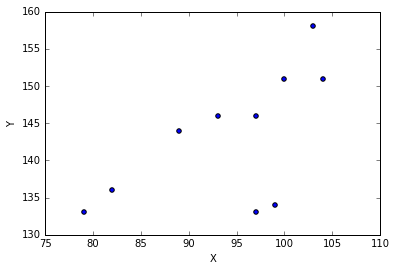

In [1]:
%matplotlib inline
from pandas import DataFrame
import matplotlib.pyplot as plt

df = DataFrame.from_dict({
    'X': [97, 104, 103, 97, 99, 82, 100, 93, 79, 89],
    'Y': [133, 151, 158, 146, 134, 136, 151, 146, 133, 144],
})

df.plot.scatter(x='X', y='Y')
plt.show()

Nå har vi et inntrykk av hvordan dataen vår er fordelt. Før vi bruker en ferdig funksjon for lineær regresjon, skal vi gjøre det slik vi ville gjort det for hånd. Pandas og flere andre matematikk-pakker i Python er bygget på numpy. Den opererer på et litt lavere nivå, og gir oss tilgang til matriser, vektorer osv.

Vi importerer numpy under forkortelsen np. Deretter lager vi en designmatrise. Denne lager vi med to rader, en fylt av bare 1-tall (len(df) henter lengden til DataFramen vår og vi lager dermed en liste med så mange enere). I tillegg henter vi ut verdiene i "X"-kolonnen i DataFramen df. Sammen danner dette designmatrisen.

In [2]:
import numpy as np

# 2-dimensjonal matrise med x-verdiene i 2. rad. Vi transponerer med .T for å få 2 kolonner (designmatrisen)
X = np.matrix([
    np.ones(len(df)), # Like mange 1-tall som lengden til DataFrame df
    df['X'] # Alle X-verdiene i vår DataFrame
]).T

print('Designmatrisen:')
print(X)

# Lager en vektor / 1-dimensjonal matrise med y-verdiene fra DataFrame df (responsvektor).
# Merk at vi bruker .T for å transponere den, slik at vi får en radvektor og ikke en kolonnevektor,
# som den ellers ville blitt
y = np.matrix(df['Y']).T

print('---')

print('Responsvektor:')
print(y)

Designmatrisen:
[[   1.   97.]
 [   1.  104.]
 [   1.  103.]
 [   1.   97.]
 [   1.   99.]
 [   1.   82.]
 [   1.  100.]
 [   1.   93.]
 [   1.   79.]
 [   1.   89.]]
---
Responsvektor:
[[133]
 [151]
 [158]
 [146]
 [134]
 [136]
 [151]
 [146]
 [133]
 [144]]


Når designmatrisen er laget, oppretter vi også responsvektoren y. Denne består av Y-verdiene fra DataFramen vår. Merk at både matrisen X og vektoren Y i utgangspunktet ville fått hhv. 2 og 1 rader, men 10 kolonner. Vi transponerer derfor begge to slik at vi får dem nedover. Vi kunne selvsagt laget dem på denne måten fra begynnelsen, men da måtte vi skrevet en del mer, og laget mange små lister, for så å slå dem sammen.

### Matriseregresjon "for hånd"

In [3]:
from IPython.display import Math

# Utregning av matriseregresjon slik vi ville gjort "for hånd". Det resulterer i en matrise,
# men vi bruker ".flat" for å hente det ut som en flat liste. Da kan vi bruke hurtigmetoden for
# å hente ut verdiene alpha og beta. Ikke fortvil om du ikke henger helt med her. Det kommer en enklere
# metode under!
alpha, beta = ((X.T*X).I*(X.T*y)).flat

# Bruker matte-formattering, og setter inn alpha og beta med 3 desimaler
Math(r'\alpha + \beta x = {:.3f} + {:.3f}x'.format(alpha, beta))

<IPython.core.display.Math object>

Over ser du utregningen gjort manuelt etter formelen for matriseregresjon. Vi tar X-matrisen transponert, ganget med seg selv (ikke transponert), og så inversen av denne (.I). Dette ganges så med X transponert ganget med y-vektoren. Det vi får da er en matrise, men vi ønsker en liste, slik at vi kan hente ut alpha og beta direkte. Derfor brukes ".flat" på slutten. Denne "flater ut" matrisen, og vi står igjen med to verdier, alpha og beta. Vi bruker en egenskap i Python som lar oss tilegne to variabler direkte fra en liste med like mange verdier.

Til slutt bruker vi Jupyter sitt "Math"-objekt. Med dette kan vi få formattert matematiske formler, og bruke spesialbokstaver o.l (her \alpha og \beta). Vi begrenser også alpha og beta til 3 desimaler med {:.3f}. Formattering i Python skjer ved å kalle "format" på en tekst, og så erstatter Python verdier mellom { og } med tilhørende parametere. .3f betyr at vi har et flyttall (kommatall), og vil ha 3 tall etter komma (punktum). Mer om formattering kan leses [her](https://docs.python.org/2/library/string.html#formatspec).

### Lineær regresjon (kortform)

Selv om det er greit å vite hvordan man gjør utregninger manuelt, vil vi ofte slippe det når vi har en PC tilgjengelig. Vi kan gjøre det med Pandas, men en enda enklere løsning er å bruke "stats"-modulen i "scipy"-pakken. Scipy er, i tillegg til Pandas og Numpy, en veldig nyttig pakke som du bør kjenne til. Her importerer vi bare en funksjon kalt linregress, og gir den våre X-verdier og Y-verdier. Ut får vi et objekt som forteller oss om stigning, krysning med Y-aksen og standardfeil.

Variablene xs og ys er ganske enkelt lister som vi henter ut fra DataFramen vår.

In [4]:
from scipy.stats import linregress

xs = df['X']
ys = df['Y']

lin_reg = linregress(xs, ys)

lin_reg

LinregressResult(slope=0.64577281761198602, intercept=82.303623299189709, rvalue=0.62352955662162679, pvalue=0.054073056598020912, stderr=0.28626830370527284)

Vi kan nå hente ut de verdiene vi er interessert i, fra lin_reg-variabelen. Deretter kan vi printe ut uttrykket for linja, på skjermen. Også her bruker vi ".format" og "Math"-objektet. Du kan fint bruke "print" direkte, med komma mellom verdiene, som vi har gjort tidligere, hvis du synes det er enklere.

In [5]:
alpha = lin_reg.intercept
beta = lin_reg.slope

print('Standardfeil: {}'.format(lin_reg.stderr))

print('---')

print('Regresjonslinje:')
Math(r'\alpha + \beta x = {:.3f} + {:.3f}x'.format(alpha, beta))

Standardfeil: 0.28626830370527284
---
Regresjonslinje:


<IPython.core.display.Math object>

### Tegne regresjonslinja

Nå skal vi tegne regresjonslinja. Vi definerer en funksjon "reg_linje" som tar inn en x-verdi, og returnerer tilhørende y. Så plotter vi et scatter-plott, slik som tidligere. Merk at vi her lagrer figuren i "figur"-variabelen, og ikke viser den direkte som tidligere. Dette er fordi vi ønsker å tegne noe mer på den.

Vi lager så en ny DataFrame, kalt df2. Første parameter er en liste med Y-verdier, og andre parameter er X-verdiene. Dette kan virke litt bakvendt, men skyldes at første verdi til en DataFrame er verdiene, og andre parameter er indeksene. _Vi kan vanligvis nøye oss med å bare legge til verdier i en DataFrame, så teller Pandas opp og legger til indekser for oss. Det kan ikke gjøres motsatt. Det gir ingen mening å spesifisere indekser, uten tilhørende data._

Videre tar vi df2-variabelen, og kjører "line"-plotteren. Her må vi sette "ax"-parameteren lik forrige figur, for vi ønsker å tegne en samlet figur. "legend=False" gjør bare slik at vi skjuler boksen som ville kommet øverst i et av hjørnene for å beskrive linjen med farge og navn. Prøv gjerne med og uten, så ser du forskjellen.

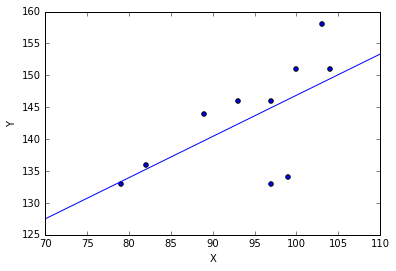

In [6]:
def reg_linje(x):
    return alpha + beta*x

figur = df.plot.scatter(x='X', y='Y')

df2 = DataFrame([reg_linje(70), reg_linje(110)], [70, 110])
df2.plot.line(ax=figur, legend=False)
plt.show()

Hvis du har lite erfaring med programmering, og Python fra før, kan nok noe av dette virke vanskelig. Det er mye man kan gjøre i Excel, men man før eller siden treffer man på en vegg.

Med Python, og egnede kodepakker, kan læringskurven virke bratt, men setter man seg litt inn i det, åpnes mange dører. Selv om jeg hadde brukt Python en god del tidligere, hadde jeg hadde aldri brukt Jupyter, Pandas eller Numpy før jeg begynte å skrive denne guiden. Notebook-formatet kan likevel hjelpe med å gjøre læring av programmering mer overkommelig. Brukeren kan laste ned, kjøre, og endre på koden, og få umiddelbar tilbakemelding.